This mock data uses a fixed global parameter + random draws for the age and theta parameters.

In [2]:
%pylab inline
import os
os.chdir('/home/oliverphilcox/ChempyMulti/')
from Chempy.parameter import ModelParameters
from Chempy.cem_function import single_timestep_chempy
a=ModelParameters()

Populating the interactive namespace from numpy and matplotlib


##### Use a different yield table set here:
SN2: Chieffi/Limongi 2018

AGB: Karakas 2016

SN1a: Seitenzahl

In [9]:
print(a.yield_table_name_sn2,a.yield_table_name_agb,a.yield_table_name_1a)

CL18_net Karakas16_net Seitenzahl


First we choose some SSP parameters - set as the TNG values.

In [10]:
from scipy.stats import norm
global_params = np.asarray([-2.3,-2.89])#norm.rvs(loc=a.p0[:2],scale=[0.3,0.3]).round(2)

In [11]:
global_params

array([-2.3 , -2.89])

In [12]:
# Generate random stellar datapoints with these global parameters
N_stars = 1000
times = np.random.uniform(2.,12.8,N_stars)

# Minm SFR constraint
log_SFR_lim = 0.29402

ism_priors = a.p0[2:]
ism_prior_widths = [0.3,0.1,0.1,0.3]

ism_params = [np.random.normal(loc=ism_priors[i],scale=ism_prior_widths[i],size=N_stars) for i in range(len(ism_priors))]
ism_params = np.asarray(ism_params).T.reshape(N_stars,len(ism_priors))

from scipy.stats import truncnorm
ism_params[:,1]=truncnorm.rvs((log_SFR_lim-ism_priors[1])/ism_prior_widths[1],np.inf,
                              loc=ism_priors[1],scale=ism_prior_widths[1],size=N_stars)

In [13]:
full_params = np.zeros([len(ism_params),7])
for i in range(len(full_params)):
    full_params[i]=np.asarray(list(global_params)+list(ism_params[i])+[times[i]])

In [14]:
out=np.inf
i=0
while out==np.inf:
    out=single_timestep_chempy((full_params[i],a))
    i+=1
_,chempy_els=out

/home/oliverphilcox/ChempyMulti/Chempy/cem_function.py:126: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  time_model = float(basic_sfr.t[cut])
/home/oliverphilcox/ChempyMulti/Chempy/cem_function.py:132: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sfr_at_end = float(basic_sfr.sfr[cut] / basic_sfr.dt)


In [15]:
def runner(index):
    """Function to compute the Chempy predictions for each parameter set"""
    b=ModelParameters()
    output=single_timestep_chempy((full_params[index],b))
    if type(output)==float:
        if output==np.inf:
            del b
        outs=np.zeros(len(chempy_els))
    else: 
        abun=output[0]
        del b;
        outs=abun
    return outs


In [16]:
import multiprocessing as mp
import tqdm
p=mp.Pool()
mock_abundances=np.asarray(list(tqdm.tqdm(p.imap(runner,range(len(full_params))),total=len(full_params))))

  0%|          | 0/1000 [00:00<?, ?it/s]/home/oliverphilcox/ChempyMulti/Chempy/cem_function.py:126: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  time_model = float(basic_sfr.t[cut])
/home/oliverphilcox/ChempyMulti/Chempy/cem_function.py:126: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  time_model = float(basic_sfr.t[cut])
/home/oliverphilcox/ChempyMulti/Chempy/cem_function.py:126: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be

/home/oliverphilcox/ChempyMulti/Chempy/cem_function.py:126: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  time_model = float(basic_sfr.t[cut])
/home/oliverphilcox/ChempyMulti/Chempy/cem_function.py:126: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  time_model = float(basic_sfr.t[cut])
/home/oliverphilcox/ChempyMulti/Chempy/cem_function.py:126: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.

/home/oliverphilcox/ChempyMulti/Chempy/cem_function.py:132: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sfr_at_end = float(basic_sfr.sfr[cut] / basic_sfr.dt)
/home/oliverphilcox/ChempyMulti/Chempy/cem_function.py:126: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  time_model = float(basic_sfr.t[cut])
/home/oliverphilcox/ChempyMulti/Chempy/cem_function.py:126: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

/home/oliverphilcox/ChempyMulti/Chempy/cem_function.py:132: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sfr_at_end = float(basic_sfr.sfr[cut] / basic_sfr.dt)
/home/oliverphilcox/ChempyMulti/Chempy/cem_function.py:126: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  time_model = float(basic_sfr.t[cut])
/home/oliverphilcox/ChempyMulti/Chempy/cem_function.py:132: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._tar

  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/process.py", l

  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
KeyboardInterrupt
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
KeyboardInterrupt
  File "/home/oliverphilcox/

KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/oliverphilcox/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self.

In [20]:
mock_ordered_abundances = np.zeros([len(mock_abundances),len(a.initial_neural_names)])        
for i,el in enumerate(a.initial_neural_names):
    for j,el_chempy in enumerate(chempy_els):
        if str(el)==str(chempy_els[j]):
            mock_ordered_abundances[:,i]=mock_abundances[:,j]
            break
        if j==len(chempy_els)-1:
            print('Element %s not found'%el)
        

In [21]:
good_id=np.where(mock_ordered_abundances[:,0]!=0)
true_abundances=mock_ordered_abundances[good_id]
true_times=times[good_id]
full_params2=full_params[good_id]

In [22]:
len(full_params2)

1000

Now jitter the true values to find mock observations using the correct fractional error.

In [50]:
pc_ab = 5
pc_time = 30
obs_ab_errors = np.ones_like(true_abundances)*float(pc_ab)/100.
obs_abundances = norm.rvs(loc=true_abundances,scale=obs_ab_errors).round(2)
obs_time_errors = (np.abs(true_times)*float(pc_time)/100.).round(2)
obs_times = norm.rvs(loc=true_times,scale=obs_time_errors).round(2)

filt = np.where((obs_times>1.)&(obs_times<13.8))
obs_ab_errors=obs_ab_errors[filt]
obs_abundances=obs_abundances[filt]
obs_time_errors=obs_time_errors[filt]
obs_times=obs_times[filt]
true_times = true_times[filt]
true_abundances = true_abundances[filt]

np.savez('/mnt/store1/oliverphilcox/ChempyMultiData/TNG_Abun2/Wrong_Yield_Mock_Data_Full.npz',
         elements = np.asarray(a.initial_neural_names,dtype=str),
         abundances = obs_abundances, abundance_errs = obs_ab_errors,
         true_time = true_times, obs_time = obs_times, obs_time_err = obs_time_errors,
         true_abuns = true_abundances)

In [23]:
# for percent_err in [1,5,10,30]:
#     obs_ab_errors = np.ones_like(true_abundances)*float(percent_err)/100.
#     obs_abundances = norm.rvs(loc=true_abundances,scale=obs_ab_errors).round(2)
#     obs_time_errors = (np.abs(true_times)*float(percent_err)/100.).round(2)
#     obs_times = norm.rvs(loc=true_times,scale=obs_time_errors).round(2)

#     np.savez('/mnt/store1/oliverphilcox/ChempyMultiData/TNG_Abun2/Wrong_Yield_Mock_Data_%.2f.npz'%(float(percent_err)/100.),
#              elements = np.asarray(a.initial_neural_names,dtype=str),
#              abundances = obs_abundances, abundance_errs = obs_ab_errors,
#              true_time = true_times, obs_time = obs_times, obs_time_err = obs_time_errors,
#              true_abuns = true_abundances)

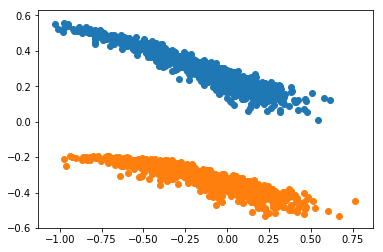

In [48]:
plt.scatter(all_abuns1[:,1],all_abuns1[:,3])
plt.scatter(all_abuns2[:,1],all_abuns2[:,3])

/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/corner/corner.py:532: RuntimeWarning: invalid value encountered in true_divide
  sm /= sm[-1]
/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/corner/corner.py:536: RuntimeWarning: invalid value encountered in less_equal
  V[i] = Hflat[sm <= v0][-1]


KeyboardInterrupt: 

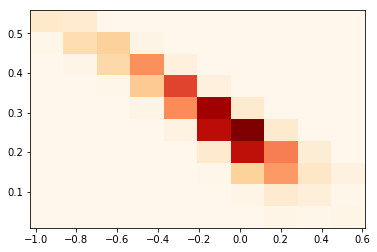

In [34]:
dat1=np.load('/mnt/store1/oliverphilcox/ChempyMultiData/TNG_Abun2/Chempy_Mock_Data_0.05.npz')
dat2=np.load('/mnt/store1/oliverphilcox/ChempyMultiData/TNG_Abun2/Wrong_Yield_Mock_Data_0.05.npz')
all_abuns1 = dat1.f.true_abuns
all_abuns2 = dat2.f.true_abuns

xx=all_abuns1[:,1]
yy=all_abuns1[:,3]
plt.hist2d(xx,yy,cmap=cm.OrRd,normed=True,bins=10)

from corner import hist2d as cohist
x=all_abuns2[:,1];y=all_abuns2[:,3]
cohist(x,y,bins=10,range=[[xx.min(),xx.max()],[yy.min(),yy.max()]],smooth=2.,
       alpha=0.1,plot_density=False,plot_datapoints=False,no_fill_contours=True,contour_kwargs={'alpha':0.6})

plt.ylabel(r'[Mg/Fe]',fontsize=16)
plt.xlabel('[Fe/H]',fontsize=16)
plt.colorbar();#ax.colorbar()


In [ ]:
plt.hist(all_abuns1[:,1])
plt.hist(all_abuns2[:,1])

### Compare mock data to our TNG galaxy:

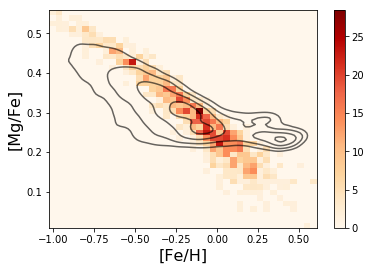

In [35]:
dat=np.load('/mnt/store1/oliverphilcox/ChempyMultiData/TNG_Abun2/TNG_Mock_Data_0.05.npz')
all_abuns=dat.f.true_abuns
times=dat.f.true_time
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

xx=mock_ordered_abundances[:,1]
yy=mock_ordered_abundances[:,3]#+28.*mock_ordered_abundances[:,7])/(16.+28.+24.);
plt.hist2d(xx,yy,cmap=cm.OrRd,normed=True,bins=40)

from corner import hist2d as cohist
x=all_abuns[:,1];y=all_abuns[:,3]#''(16.*all_abuns[:,6]+all_abuns[:,3]*24.+all_abuns[:,7]*28.)/(16.+24.+28.)
cohist(x,y,bins=100,range=[[xx.min(),xx.max()],[yy.min(),yy.max()]],smooth=2.,
       alpha=0.1,plot_density=False,plot_datapoints=False,no_fill_contours=True,contour_kwargs={'alpha':0.6})

plt.ylabel(r'[Mg/Fe]',fontsize=16)
plt.xlabel('[Fe/H]',fontsize=16)
plt.colorbar();#ax.colorbar()
#plt.show()

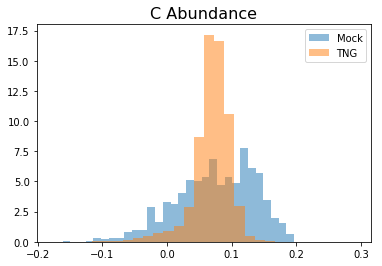

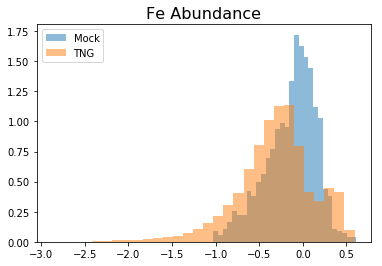

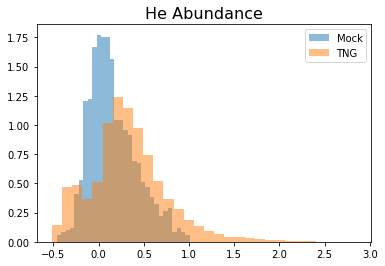

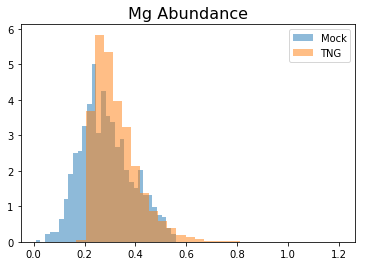

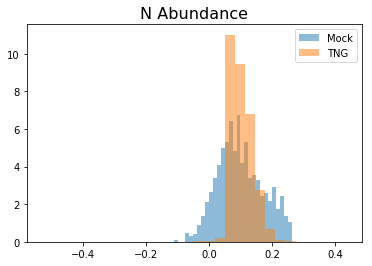

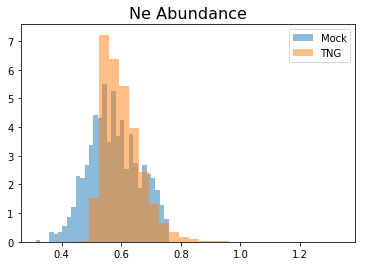

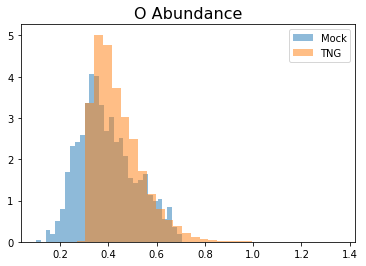

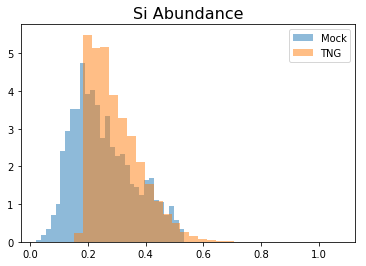

In [24]:
for i in range(len(a.initial_neural_names)):
    plt.figure()
    plt.hist(mock_ordered_abundances[:,i],alpha=0.5,density=True,bins=30,label='Mock')
    plt.hist(all_abuns[:,i],alpha=0.5,density=True,bins=30,label='TNG')
    plt.title('%s Abundance'%a.initial_neural_names[i],fontsize=16);plt.legend()

In [38]:
# obs_errors = np.zeros(len(a.initial_neural_names))
# for i,el in enumerate(a.initial_neural_names):
#     for j,el_sol in enumerate(sol_names):
#         if str(el)==str(sol_names[j]):
#             obs_errors[i]=all_sol_errors[j]
#             break
#         if j==len(sol_names)-1:
#             print('Element %s not found'%el)
